<a href="https://colab.research.google.com/github/onez9/mlexpiriens/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
import sklearn
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from zipfile import ZipFile
import os
# from skimage.data import imread
import matplotlib.pyplot as plt
import skimage
# import pixellib
from pixellib.instance import instance_segmentation


print(f'tensorflow: {tf.__version__}')
print(f'keras: {keras.__version__}')
print(f'numpy: {np.__version__}')
print(f'sklearn: {sklearn.__version__}')
# print(f'os: {os.__version__}')


tensorflow: 2.15.0
keras: 2.15.0
numpy: 1.23.1
sklearn: 1.2.2


In [ ]:
file_name='mnist_train_small.csv'
with open(file_name, "r") as fi:
  txt = fi.read()
  print(txt)

In [ ]:
file_name = 'drive/MyDrive/BelgiumTSC_Testing.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Extract testing is done')

file_name = 'drive/MyDrive/BelgiumTSC_Training.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Extract training is done')

Extract testing is done
Extract training is done


In [ ]:




config = tf.compat.v1.ConfigProto(log_device_placement = True)
config = tf.compat.v1.ConfigProto(allow_soft_placement = True)


# initialize session and run result
with tf.compat.v1.Session() as sess:
  x1 = tf.constant([1,2,3,4])
  x2 = tf.constant([5,6,7,8])


  result = tf.multiply(x1, x2)
  print(result)
  output = sess.run(result)
  print(output)

In [ ]:


def load_data(data_directory):
  directories = [d for d in os.listdir(data_directory)
                  if os.path.isdir(os.path.join(data_directory, d))]
  print(directories)
  labels = []
  images = []
  for d in directories:
    label_directory = os.path.join(data_directory, d)
    print(label_directory)
    file_names = [os.path.join(label_directory, f) for f in os.listdir(label_directory)
        if f.endswith('.ppm')]
    print(file_names)
    for f in file_names:
      images.append(skimage.io.imread(f))
      labels.append(int(d))
    return images, labels

train_data_directory = "Training"
test_data_directory = "Testing"

# images, labels = load_data(train_data_directory)
images, labels = load_data(train_data_directory)

In [ ]:
images = np.array(images, dtype=list)
print(images.size) # вывести количество элементов массива
print(images.ndim) # размерность массива

labels = np.array(labels)
print(len(labels))
# images[2]
print(len(set(labels)))

In [ ]:
plt.hist(labels, 62)
plt.show()

In [ ]:
# Import the `pyplot` module of `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see
traffic_signs = [30, 22, 50, 40]

# Fill out the subplots with the random images that you defined
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

In [ ]:
def object_detection_on_an_image():
  segment_image = instance_segmentation()
  pathmodel = "drive/MyDrive/mask_rcnn_coco.h5"
  segment_image.load_model(pathmodel)


  segment_image.segmentImage(
      image_path='40.jpg',
      show_bboxes=True,
      output_image_name='output.jpg'
  )

def main():
  object_detection_on_an_image()

# if __name__=='__main__':
main()

In [ ]:
# plt.subplot(1,1,1)
# plt.axis('off')
import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(skimage.io.imread("output.jpg"))
plt.subplots_adjust(wspace=0.5)
plt.show()
print('2343')
# plt.imshow(skimage.io.imread("40.jpg"))

In [ ]:
!pip3 install mxnet-mkl numpy

In [ ]:
import os
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
print(tf.__version__)

if __name__=='__main__':
    print('Programm is run')
    # константные тензоры (массивы данных)
    a = tf.constant(1, shape=(1,1))
    b = tf.constant([1,2,3,4])
    c = tf.constant([[1,2],
                     [3,4],
                     [5,6]], dtype=tf.float16)
    a1 = tf.cast(a, dtype=tf.float32) # преобразует тензор к новому типу данных
    b1 = np.array(b) # преобразовать тензор к типу numpy
    b2 = b.numpy()
    # print(c,a1,b1,b2,sep='\n\n')

    # переменные тензоры (массивы данных)
    v1 = tf.Variable(-1.5)
    v2 = tf.Variable([7,3,5,6], dtype=tf.float32)
    v3 = tf.Variable(b) # создаём переменный тензор на основе константных значений

    v4 = tf.Variable(v1) # cпособ клонирования переменных тензоров
    # print(v1,v2,v3,sep='\n\n')

    v2.assign([0,0,0,0]) # назначить новые значения тензору
    # print(v2)
    v2.assign_sub([3,3,3,3])
    # print(v2)
    v2.assign_add([1,2,3,4])
    # print(v2)

    # print('Получение размерности.')
    # print(v1.shape)
    # print(v2.shape)
    # print(v3.shape)
    # print(v4.shape)
    # print(c.shape)

    # print('Срезы')
    # переменные val0 и val1 хранят общие области памяти
    val0 = v2[2]
    val1 = v2[1:3]
    # print(val0)
    # print(val1)



    x = tf.constant(range(10))
    x_indx = tf.gather(x, [0,4]) # создали новый тензор на основе x
    # print(x, x_indx, sep='\n')


    v7 = tf.constant([[1,2,7],[3,4,8],[5,6,9]])
    v7_indx = v7[:2, -1] # -1 - последний столбец
    # print(v7_indx)


    v8 = tf.constant(range(30)) # будем менять форму у тензора
    # print(v8)
    # v8_new = tf.reshape(v8, [5,6]) # не создаём нового тензора, а просто поменяли форму
    v8_new = tf.reshape(v8, [5,-1])
    v8T = tf.transpose(v8_new, perm=[1, 0])
    # print(v8_new.numpy())
    # print(v8T)

    clear = lambda: os.system('clear')
    clear()




In [ ]:
# математические операции над тензорами
import tensorflow as tf
import numpy as np

if __name__=='__main__':
  a = tf.zeros((3,5))
  print(a)

  b = tf.ones_like(a) # создаёт новый тензор
  print(b)

  c = tf.zeros_like(b)
  print(c)

  d = tf.eye(7, 5) # возвращает тензор с еденицами по главной диагонали
  print(d)

  e = tf.fill((5, 3), 666) # позволяет заполнить тензор заданным числом
  print(e)

  f = tf.identity(c) # вроде как клонирует тензор
  print(c)
  print(f)

  g = tf.range(1, 11, 0.5) # from, to, step
  g = tf.reshape(g, [5, -1])
  g = tf.random.shuffle(g)
  print(g)

  # 0 - математическое ожидание, 0.1 - среднеквадратичное отклонение
  h = tf.random.normal((2,4), 0, 0.1) # возвращает тензор с нормально распределёнными случайными величинами с МО и СКО
  # print(h)


  # равномерно распределённые значения
  i = tf.random.uniform((3,5), -1, 1)
  # print(i)


  # tf.random.set_seed(1) # устанавливает зерно датчика случайных чисел

In [ ]:
# математические операции над тензорами
import tensorflow as tf
import numpy as np

if __name__=='__main__':
  a = tf.constant([[1,2,3],[7,8,9]])
  b = tf.constant([[4,5,6],[10,11,12]])
  print(a*b) # поэлементные операции
  print(tf.multiply(a,b))
  print(a/b)
  print(tf.divide(a,b))
  print(b//a)
  # c = tf.Variable(b)
  # print(c)
  # print(c**2)
  b = tf.reshape(b, [3,-1])
  print(a)
  print(b)
  # print(tf.reshape((a-b), [3,2]))

  # print(tf.tensordot(a,b, axes=0)) # внешнее векторное умножение в tensorflow

  # a = tf.constant([1,2,3])
  # b = tf.constant([4,5,6])
  # print(a)
  # print(b)


  print("Внутренние векторное переумножение") # ещё называют скалярным произведением
  print(tf.tensordot(b,a, axes=1)) # это типо как в школе, лицее, вузе, ещё одном вузе учили. Тот случай когда порядок важен

  a2 = tf.constant(tf.range(1,10), shape=(3,3))
  b2 = tf.constant(tf.range(5,14), shape=(3,3))
  print(a2)
  print(b2)
  print(tf.matmul(a2, b2)) # работает также как и @ и tf.tensordot # тоже какое-то матричное умножение
  print(a2 @ b2)
  result = tf.tensordot(a2,b2,axes=1)
  print(result)

  # получить сумму элементов tensora
  print(tf.reduce_sum(result))
  print(tf.reduce_sum(result, axis=[1, 0]))
  print(tf.reduce_sum(tf.constant(tf.range(1,10), shape=(3,3))))

  # получить сумму по столбцам
  print(tf.reduce_sum(result, axis=0))

  # получить сумму по строкам
  print(tf.reduce_sum(result, axis=1))


  # получить среднее арифметическое от значения тензора
  print(result)
  print(tf.reduce_mean(result))

  # получить минимальное или максимальное значение в тензоре
  print(tf.reduce_min(result))
  print(tf.reduce_max(result))
  # мин макс
  # столбцы
  print(tf.reduce_min(result, axis=1))
  print(tf.reduce_max(result, axis=1))
  # строки
  print(tf.reduce_min(result, axis=0))
  print(tf.reduce_max(result, axis=0))

  # произведение по всем элементам
  print(tf.reduce_prod(result))

  # get sqrt from result
  print(tf.sqrt(tf.cast(result, dtype=tf.float32)))

  # get square from result
  print(tf.square(result))

  # get sin
  print(tf.sin(tf.range(-3.14, 3.14, 1)))

In [1]:
# реализация автоматического дифференцирования
# Задача получить значение производной в точке -2.0
import os

os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf


x = tf.Variable(-2.0) # создаём тензор

with tf.GradientTape() as tape: # with - мэнаджер контекста # все промежуточные вычисления сохраняются в этом объекте tape
  y = x ** 2 # для вот этой функции

df = tape.gradient(y, x) # в этом методе выполняется обратный проход по графу вычислений и вычисляет значения производной y по x
print(df) # выводим значение производной










tf.Tensor(-4.0, shape=(), dtype=float32)


In [41]:
# реализация автоматического дифференцирования
# Задача получить значение производной в точке -2.0
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf


# w = tf.Variable(tf.random.normal((3,2)))
# b = tf.Variable(tf.zeros(2, dtype=tf.float32))
# x = tf.Variable([[-2.0, 1.0, 3.0]])

x = tf.Variable(0, dtype=tf.float32, trainable=True) # можно запретить вычислять производные если добаить аргумент trainable=False
# b = tf.constant(1.5) # так производная не будет вычисляться
b = tf.Variable(1.5, dtype=tf.float32) # b = tf.Variable(1.5, dtype=tf.float32) + 1.0, если добавим константу (+ 1.0), то b - перестанет быть переменной


# полностью отключить отслеживание переменных - watch_accessed_variables=False
# что бы можно было 2 раза подряд запускать tape.gradient(f, x) - используем параметр persistent=True
with tf.GradientTape(watch_accessed_variables=False, persistent=True) as tape:
  # with tf.GradientTape() as tape: # tape отслеживает тензоры только с Variable, c constant - нет. Для констан объект tape не производит промежуточных вычислений.
  tape.watch(x) # включить отслежиание переменной х. Можно вместо х, написать список переменных [x, b]
  # y = x @ w + b
  # loss = tf.reduce_mean(y ** 2)
  y = 2*x
  f = y*y
  # f = (x + b)**2 + 2*b

# df = tape.gradient(loss, [w, b])
# df = tape.gradient(f, [x, b])
# print(f'Производная по x: {df[0]}\nПроизводная по b: {df[1]}')
df = tape.gradient(f, y) # когда вызывается первый градиент то он автоматически высвобождает все ресурсы связанные с промежуточными вычислениями
df_x = tape.gradient(f, x) # если вызову gradient второй раз без добавления параметра persistent=True будет ошибка
print(f'f\'x: {df_x}')
print(f'f\'y: {df}')


# если добаили persistent=True - то нужно явно удалить объект tape
del tape


f'x: 0.0
f'y: 0.0


<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7113903>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9883388>


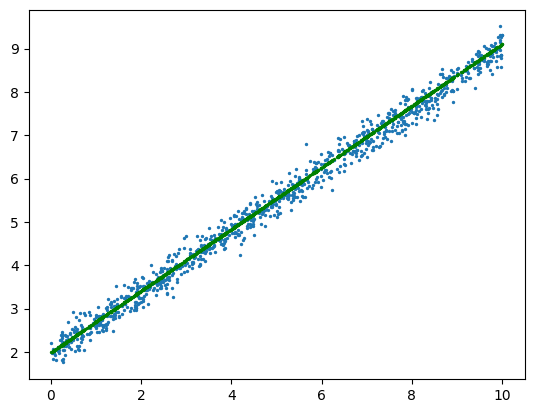

In [75]:


# градиентные алгоритмы оптимизации
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


TOTAL_POINTS = 1000
# задача - по значениям y и x определить значения параметров k и b
x = tf.random.uniform(shape=[TOTAL_POINTS], minval=0, maxval=10) # генерируем вектор из 1000 точек
noise = tf.random.normal(shape=[TOTAL_POINTS], stddev=0.2) # генерируем 1000 точек с нормальным распределением с 0-ым математическим ожиданием и СКО = 0.2

k_true = 0.7 # те данные по которым строятся вся эта чепуха
b_true = 2.0

y = x*k_true + b_true + noise # noise - гаусовский шум

# plt.scatter(x, y, s=2) # используется для создания графика рассеяния, s - это размер точки
# plt.show()



# что бы решить задачу говорим, нет допускаем начальные значения, для значений которые собираемся искать (k,b), применяя алгоритм градиентного спуска
k = tf.Variable(0.0)
b = tf.Variable(0, dtype=tf.float32)


BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE # необходимо для разбития диапозона

EPOCHS = 50
learning_rate = 0.02 # шаг сходимости градиентного алгоритма

# для того чтобы повысить вероятность выхода из ямы применяется метод моментов для этого используем аргумент momentum=0.5
# также можно добавить метод нестерова, который как бы улучшает вышеописанный метод
# opt = tf.optimizers.SGD(learning_rate=0.02, momentum=0.5, nesterov=True) # оптимизатор - Stochastic Gradient Descent (Стохастический градиентный спуск)
# opt = tf.optimizers.Adagrad(learning_rate=0.3) # метод который увеличивает или уменшьшает только там где нужно

# оптимизатор adadelta - закрывает недостак предыдущего(в нём шаг вроде уменшается)
# opt = tf.optimizers.Adadelta(learning_rate=4.0) # нужна понимать что каждый оптимизатор нужно применять по задаче
# opt = tf.optimizers.RMSprop(learning_rate=0.01)
opt = tf.optimizers.Adam(learning_rate=2.0)

for n in range(EPOCHS):
  for n_batch in range(num_steps):
    y_batch = y[n_batch*BATCH_SIZE : (n_batch + 1)*BATCH_SIZE] # необходимо для разбития диапозона
    x_batch = x[n_batch*BATCH_SIZE : (n_batch + 1)*BATCH_SIZE] # необходимо для разбития диапозона

    with tf.GradientTape() as tape:
      f = k*x_batch + b # k и b - тут начальные значения которые мы подобрали, а x - это, то что мы сгенерировали
      loss = tf.reduce_mean(tf.square(y_batch - f))

    dk, db = tape.gradient(loss, [k, b])

    opt.apply_gradients(zip([dk,db], [k, b])) # если используем оптимизатор то следующие 2 строчки можно не использовать
    # k.assign_sub(learning_rate * dk)
    # b.assign_sub(learning_rate * db)

print(k, b, sep='\n')

y_pr = k*x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='g', s=2)
plt.show()










